# **Dropping duplicates**

---



Removing duplicates is an essential skill to get accurate counts because often, you don't want to count the same thing multiple times.

`df.drop_duplicates(subest=['col1','col2'....], keep='first'/'last'/'False', inplace='True'/'False')`

subset indicates which column's duplicate element we want to remove.

If keep is first, it indicates first duplicate element will be keeped and others are removed. Last idicates, the last will be removed. False means every duplicate elements will be removed.

inplace True means, it will effect the orginal data frame.
False means, doesn't effect the orginal.

In [ ]:
import numpy as np
import pandas as pd
data={'Name':['Ovi','Rizvi','Tamim','Azan','Rifat','Ovi','Sagor','Sahin','Sagor'],
      'ID':[20,41,17,38,40,20,10,29,30],
      'Score':[3.2,3.65,3.35,3.1,3.6,3.2,3.5,3.38,3.5]}
Result=pd.DataFrame(data)
print(Result)

    Name  ID  Score
0    Ovi  20   3.20
1  Rizvi  41   3.65
2  Tamim  17   3.35
3   Azan  38   3.10
4  Rifat  40   3.60
5    Ovi  20   3.20
6  Sagor  10   3.50
7  Sahin  29   3.38
8  Sagor  30   3.50


Drop the duplicate from the DataFrame.

In [ ]:
result1=Result.drop_duplicates(subset=['Name','ID'],keep='last',inplace=False)
print(result1.sort_values('ID'))

    Name  ID  Score
6  Sagor  10   3.50
2  Tamim  17   3.35
5    Ovi  20   3.20
7  Sahin  29   3.38
8  Sagor  30   3.50
3   Azan  38   3.10
4  Rifat  40   3.60
1  Rizvi  41   3.65


# **Counting categorical variables**

---



Counting is a great way to get an overview of your data and to spot curiosities that you might not notice otherwise.

To count the number: 

```
df['col'].value_counts()
df['col'].value_counts(sort=True) #descending
```

To count the proportion:


```
df['col'].value_counts(normalize=True)
df['col'].value_counts(sort=True, normalize=True) #descending
```




Count the **number** & **proportion** of **store** of each store type in store_types.



In [ ]:
print(result1['Score'].value_counts())
print(result1['Score'].value_counts(normalize=True))

3.50    2
3.65    1
3.35    1
3.10    1
3.60    1
3.20    1
3.38    1
Name: Score, dtype: int64
3.50    0.250
3.65    0.125
3.35    0.125
3.10    0.125
3.60    0.125
3.20    0.125
3.38    0.125
Name: Score, dtype: float64


# **GroupBy Method**

---



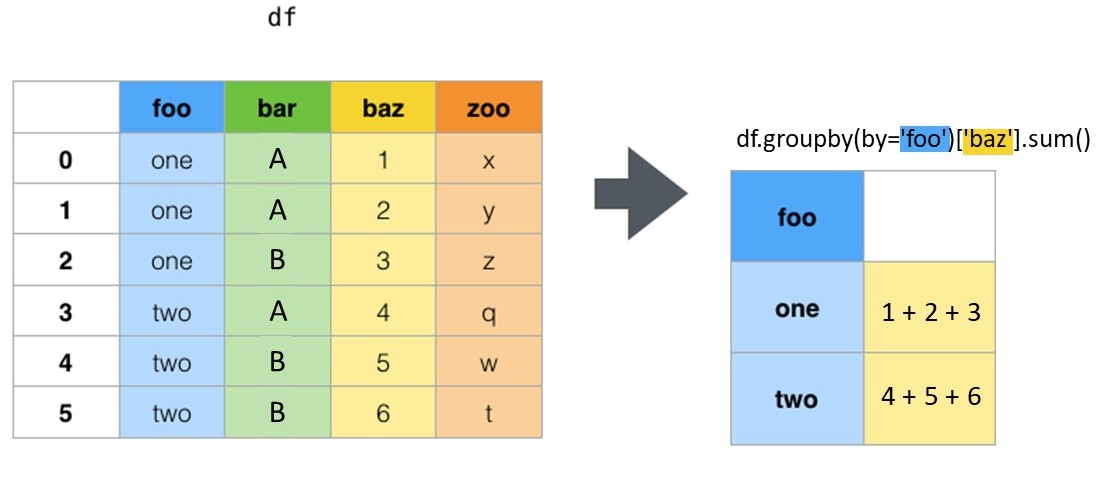


In [ ]:
df1={'foo':['one','one','one','two','two','two'],
    'bar':['A','A','B','A','B','B'],
    'baz':[1,2,3,4,5,6],
    'zoo':['x','y','z','q','w','t']}
table=pd.DataFrame(df1)
print(table)

   foo bar  baz zoo
0  one   A    1   x
1  one   A    2   y
2  one   B    3   z
3  two   A    4   q
4  two   B    5   w
5  two   B    6   t


Group **table** by **foo** and **bar** and find the mean,
median, sum, max, min of **baz**

---




In [ ]:
print(table.groupby(['foo','bar'])['baz'].agg([np.mean,np.median,np.sum,max,min]))

         mean  median  sum  max  min
foo bar                             
one A     1.5     1.5    3    2    1
    B     3.0     3.0    3    3    3
two A     4.0     4.0    4    4    4
    B     5.5     5.5   11    6    5


In [ ]:
print(table.groupby(['foo','bar'])['baz'].agg([np.sum]))

         sum
foo bar     
one A      3
    B      3
two A      4
    B     11


In [21]:
print(table.groupby('foo')['baz','bar'].agg([np.sum]))

    baz  bar
    sum  sum
foo         
one   6  AAB
two  15  ABB


<ipython-input-21-89e35d587329>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(table.groupby('foo')['baz','bar'].agg([np.sum]))


# **Pivot Table**

---
Pivot tables are the standard way of aggregating data in spreadsheets. In pandas, pivot tables are essentially just another way of performing grouped calculations. That is, the .pivot_table() method is just an alternative to .groupby().


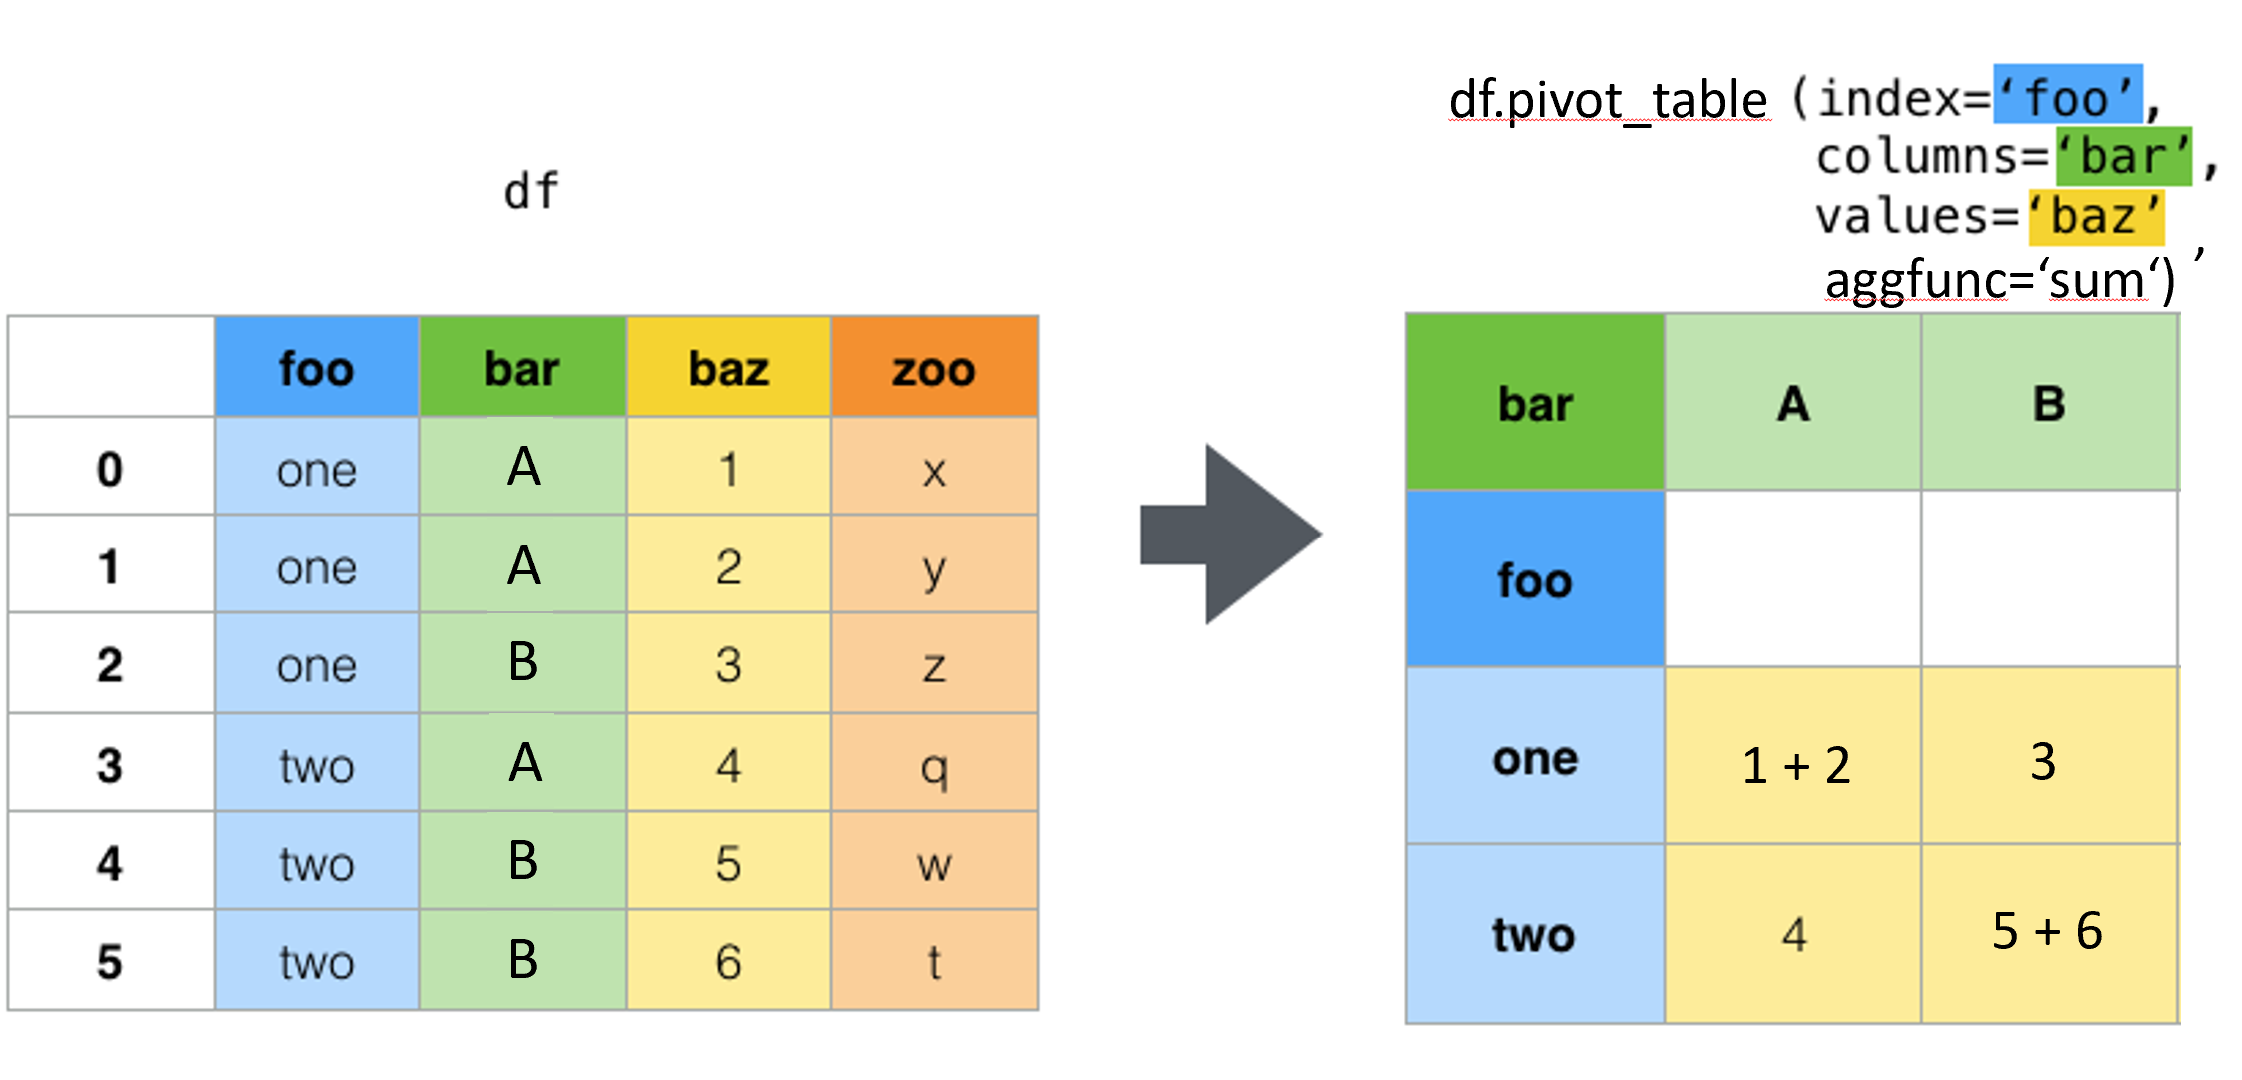


Get the mean, median, sum, max, min (using NumPy functions) of **baz** by **foo** and **bar** using **.pivot_table()**

---



In [22]:
print(table.pivot_table(index='foo',columns='bar',values='baz',aggfunc=[np.mean,np.median,np.sum,max,min]))

    mean      median      sum     max    min   
bar    A    B      A    B   A   B   A  B   A  B
foo                                            
one  1.5  3.0    1.5  3.0   3   3   2  3   1  3
two  4.0  5.5    4.0  5.5   4  11   4  6   4  5


In [23]:
print(table.pivot_table(index='foo',columns='bar',values='baz',aggfunc=np.sum))

bar  A   B
foo       
one  3   3
two  4  11
